In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Carga y descripción general de los datos

In [2]:
houses = pd.read_csv('Casas_venezuela.csv')
apartments = pd.read_csv('Departamentos_venezuela.csv')

In [3]:
houses.describe().apply(lambda s: s.apply('{0:.3f}'.format))

,Precio,Área Privada,Terreno,Dormitorios,Total Baños,Baños Completos,Puestos De Estacionamiento,Medios Baños
count,360.000,360.000,360.000,360.000,360.000,360.000,312.000,360.000
mean,179371.525,976.667,905.600,4.264,4.125,3.647,3.997,0.472
std,239843.702,5844.031,5218.891,1.574,1.997,1.731,2.857,0.731
min,3000.000,41.000,2.000,1.000,1.000,0.000,0.000,0.000
25%,35000.000,195.500,190.500,3.000,3.000,2.000,2.000,0.000
50%,110000.000,316.000,380.000,4.000,4.000,3.000,3.000,0.000
75%,221250.000,450.000,653.750,5.000,5.000,4.000,5.000,1.000
max,1900000.000,95000.000,95000.000,13.000,14.000,13.000,25.000,6.000


In [4]:
apartments.describe().apply(lambda s: s.apply('{0:.3f}'.format))

,Precio,Área Privada,Dormitorios,Total Baños,Baños Completos,Puestos De Estacionamiento,Medios Baños
count,360.000,360.000,360.000,360.000,360.000,360.000,360.000
mean,114670.139,267.489,2.831,2.508,2.300,1.644,0.203
std,188267.671,1080.066,2.940,1.199,0.964,0.921,0.448
min,270.000,35.000,1.000,1.000,0.000,0.000,0.000
25%,30000.000,78.000,2.000,2.000,2.000,1.000,0.000
50%,60000.000,105.000,3.000,2.000,2.000,1.000,0.000
75%,116250.000,148.000,3.000,3.000,3.000,2.000,0.000
max,1700000.000,11969.000,56.000,7.000,6.000,6.000,2.000


En estas tablas resumen se encuentran algunos indicadores estadísticos comunes como la media, la desviación estandard, el mínimo, el primer cuartil, mediana, tercer cuartil y el máximo.

In [5]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Precio                      360 non-null    int64  
 1   Codígo RAH                  360 non-null    object 
 2   Tipo de Propiedad           360 non-null    object 
 3   Estilo                      360 non-null    object 
 4   Área Privada                360 non-null    int64  
 5   Terreno                     360 non-null    int64  
 6   Estado Del Inmueble         360 non-null    object 
 7   Dormitorios                 360 non-null    int64  
 8   Total Baños                 360 non-null    int64  
 9   Baños Completos             360 non-null    int64  
 10  Tipo De Estacionamiento     360 non-null    object 
 11  Puestos De Estacionamiento  312 non-null    float64
 12  Amoblado                    360 non-null    object 
 13  Dormitorio De Servicio      360 non

In [6]:
apartments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Precio                      360 non-null    int64  
 1   Codígo RAH                  360 non-null    object 
 2   Tipo de Propiedad           360 non-null    object 
 3   Estilo                      360 non-null    object 
 4   Área Privada                360 non-null    int64  
 5   Estado Del Inmueble         360 non-null    object 
 6   Dormitorios                 360 non-null    int64  
 7   Total Baños                 360 non-null    int64  
 8   Baños Completos             360 non-null    int64  
 9   Tipo De Estacionamiento     360 non-null    object 
 10  Puestos De Estacionamiento  360 non-null    int64  
 11  Amoblado                    360 non-null    object 
 12  Dormitorio De Servicio      360 non-null    object 
 13  País                        360 non

# Análisis general de los datos numéricos

In [7]:
# Separo las columnas numericas
houses_numeric_features = [col for col in houses.columns if houses[col].dtype != 'object']
apartments_numeric_features = [col for col in apartments.columns if apartments[col].dtype != 'object']

In [8]:
houses_numeric_features

['Precio',
 'Área Privada',
 'Terreno',
 'Dormitorios',
 'Total Baños',
 'Baños Completos',
 'Puestos De Estacionamiento',
 'Medios Baños']

In [9]:
# Grafico para cada columna numerica un histograma y un boxplot
def graph_numeric_features(df, features):
    for col in features:
        fig, ax = plt.subplots(2, 1, figsize=(9,6), height_ratios=[2,1])
        
        # Intento transformar la columa a int, y si no se puede le quito los nan a las columnas float
        try:
            feature = df[col].astype(int)
        except pd.errors.IntCastingNaNError:
            feature = df[ df[col].notnull() ][col]
        
        # Histograma
        ax[0].hist(feature, bins=50, edgecolor = "black")
        # Distribucion
        feature.plot(kind='kde', ax=ax[0], secondary_y = True, color='green', linestyle='dashed')
        ax[0].ticklabel_format(style='plain')
        ax[0].axvline(feature.median(), color='red', linestyle='dashed', linewidth=2, label= f'Mediana = {feature.median():.3f}')
        ax[0].axvline(feature.mean(), color='orange', linestyle='dashed', linewidth=2, label= f'Media = {feature.mean():.3f}')
        ax[0].set_ylabel('Cantidad')
        ax[0].legend()
        
        # Boxplot
        ax[1].boxplot(feature, vert = False, medianprops = { 'color':'red' })
        ax[1].get_xaxis().get_major_formatter().set_scientific(False)

        fig.suptitle(col)
    plt.show()

## Casas

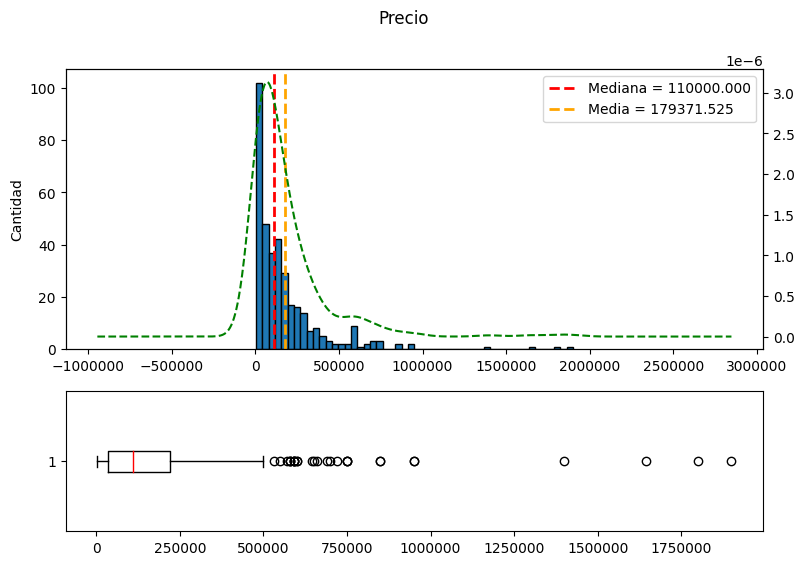

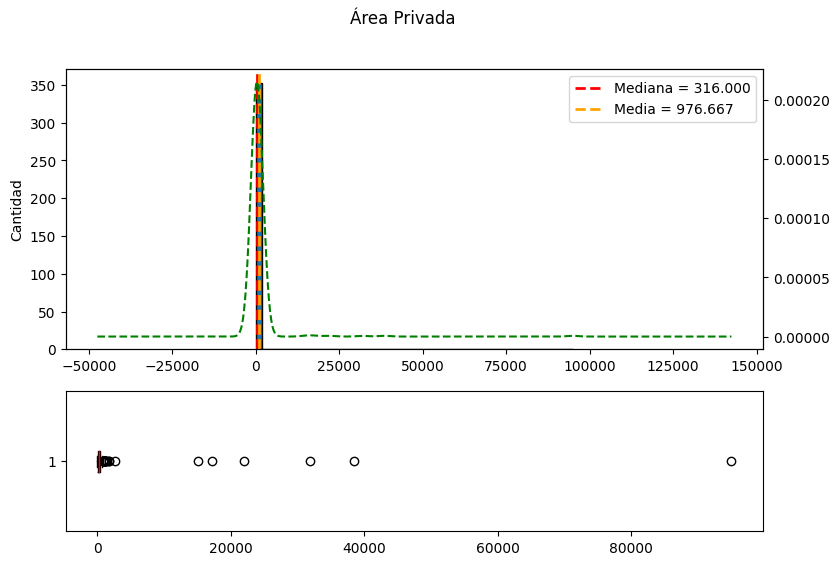

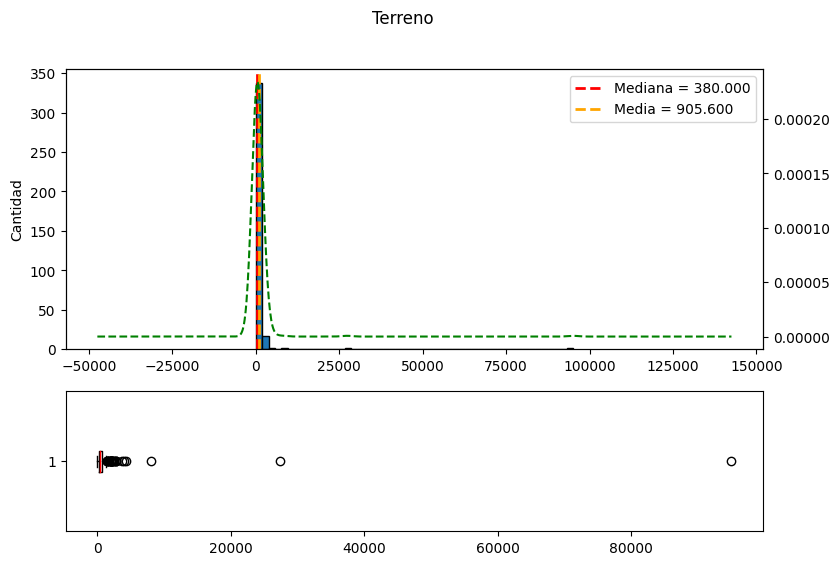

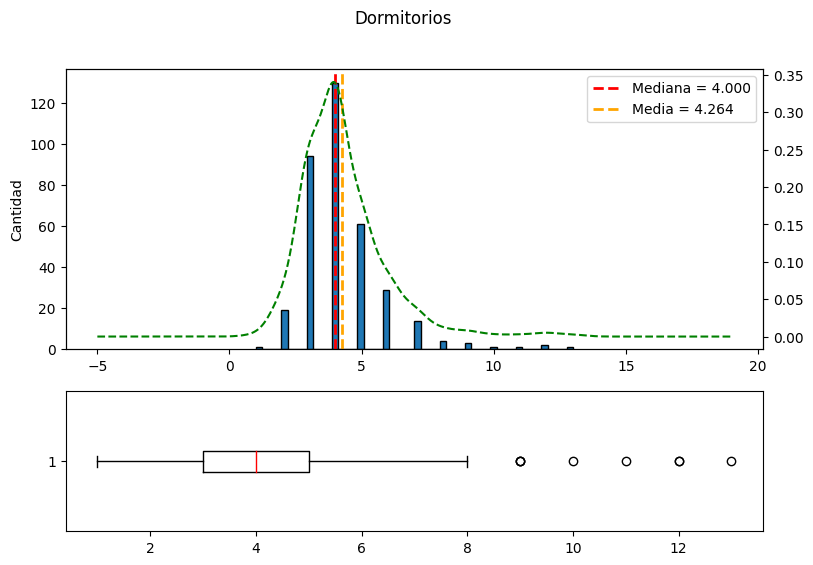

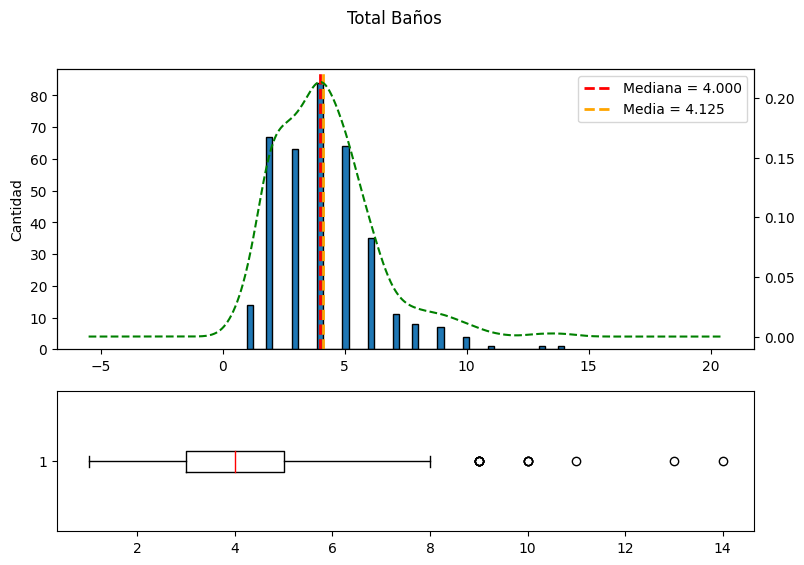

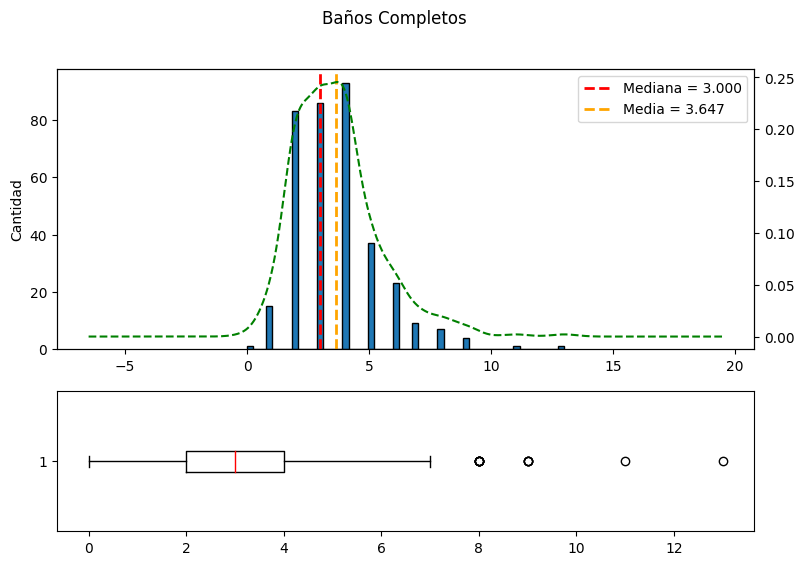

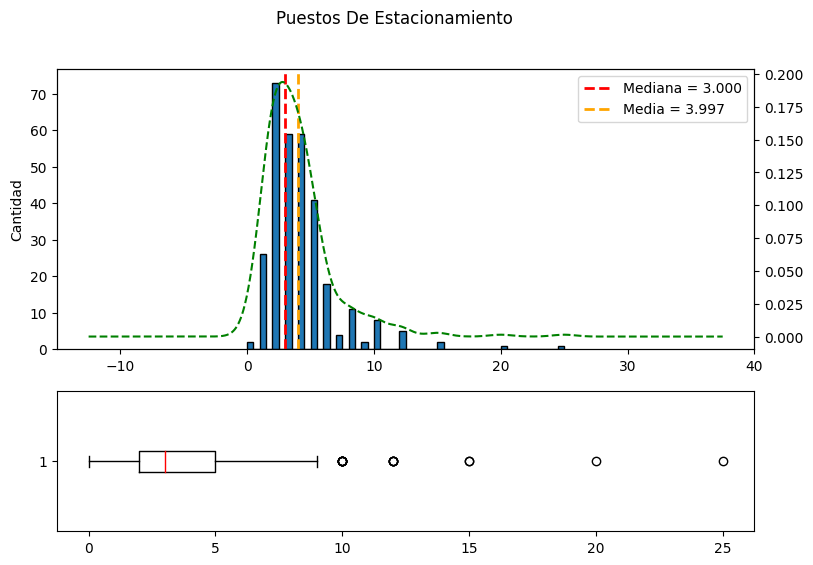

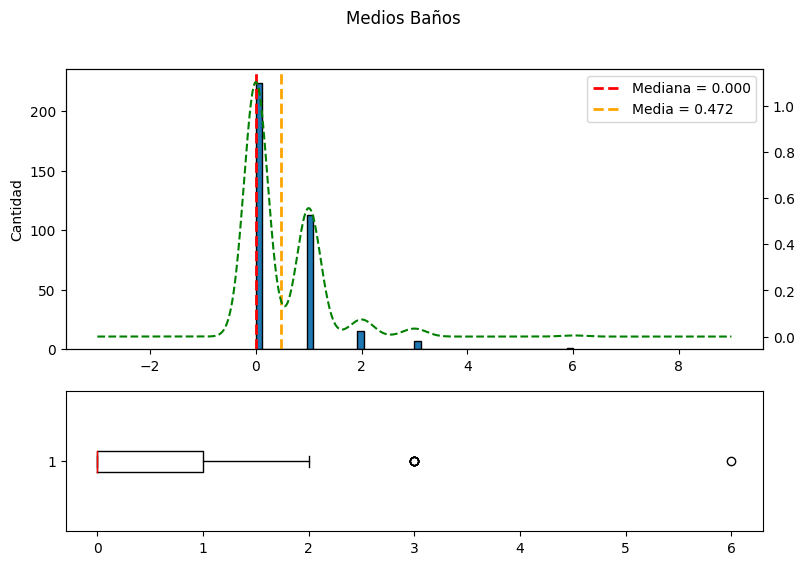

In [10]:
graph_numeric_features(houses, houses_numeric_features)

Podemos notar como los precios, dormitorios, total de baños, cantidad de baños y puestos de estacionamientos tienen una distribución asimétrica con cola a la derecha, lo cual se evidencia no solo gráficamente sino también porque la media está a la derecha de la mediana.  
Sin embargo, el análisis de los valores de terrenos y áreas es inconcluso ya que hay outliers muy grandes, y en particular hay uno que es demasiado grande comparado a los demás, que distorsionan el gráfico.

In [11]:
houses[['Terreno', 'Área Privada']].idxmax()

Terreno         115
Área Privada    115
dtype: int64

In [12]:
houses.iloc[115]

Precio                                       550000
Codígo RAH                              VE 23-26132
Tipo de Propiedad                              Casa
Estilo                                      1 Nivel
Área Privada                                  95000
Terreno                                       95000
Estado Del Inmueble                           Usado
Dormitorios                                       9
Total Baños                                       6
Baños Completos                                   6
Tipo De Estacionamiento                 Descubierto
Puestos De Estacionamiento                     20.0
Amoblado                               Parcialmente
Dormitorio De Servicio                           Si
Calle                                   Calle Ciega
País                                      Venezuela
Estado                                       Vargas
Ciudad                           El Junquito-Vargas
Urbanización                  El Junko Country Club
Medios Baños

Este outlier con 95000 m^2 de área me distorsiona muchísimo el análisis, y no parece ser un error de tipeo, ya que en la publicación de la casa hacen énfasis en esta área tan grande.

In [13]:
# Grafico dejando a los mayores outliers, quedandome con los valores por debajo del cuantil 95% y por encima del 1%
def graph_numeric_without_outliers(df, features):
    for col in features:
        fig, ax = plt.subplots(2, 1, figsize=(9,6), height_ratios=[2,1])

        try:
            feature = df[col].astype(int)
        except pd.errors.IntCastingNaNError:
            feature = df[ df[col].notnull() ][col]
        
        feature = feature[(feature < feature.quantile(q=0.95)) & (feature > feature.quantile(q=0.01))]
        
        ax[0].hist(feature, bins=50, edgecolor = "black")
        feature.plot(kind='kde', ax=ax[0], secondary_y = True, color='green', linestyle='dashed')
        ax[0].ticklabel_format(style='plain')
        ax[0].axvline(feature.median(), color='red', linestyle='dashed', linewidth=2, label= f'Mediana = {feature.median():.3f}')
        ax[0].axvline(feature.mean(), color='orange', linestyle='dashed', linewidth=2, label= f'Media = {feature.mean():.3f}')
        ax[0].set_ylabel('Cantidad')
        ax[0].legend()
        
        ax[1].boxplot(feature, vert = False, medianprops = { 'color':'red' })
        ax[1].get_xaxis().get_major_formatter().set_scientific(False)

        fig.suptitle(col)
    plt.show()

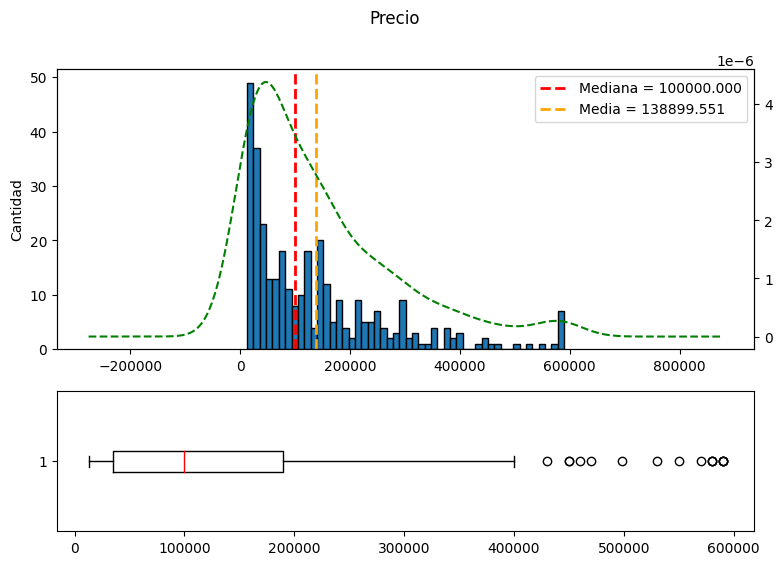

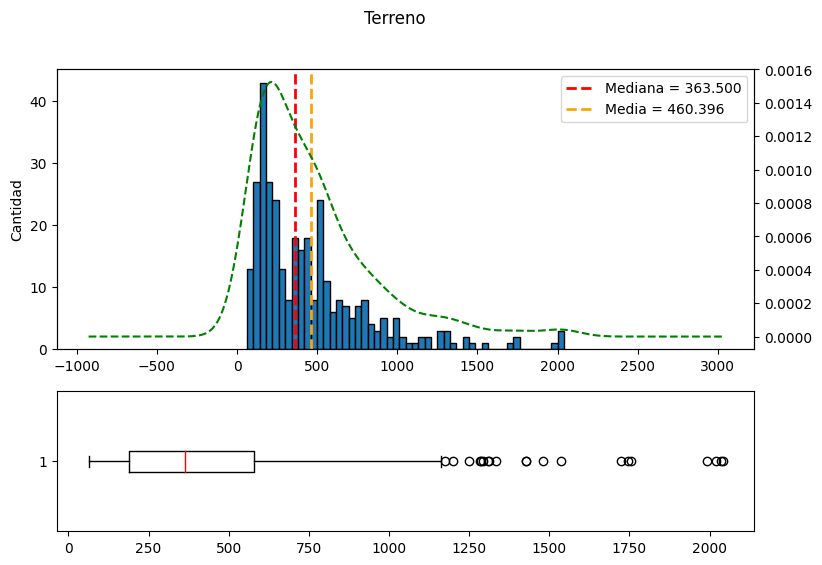

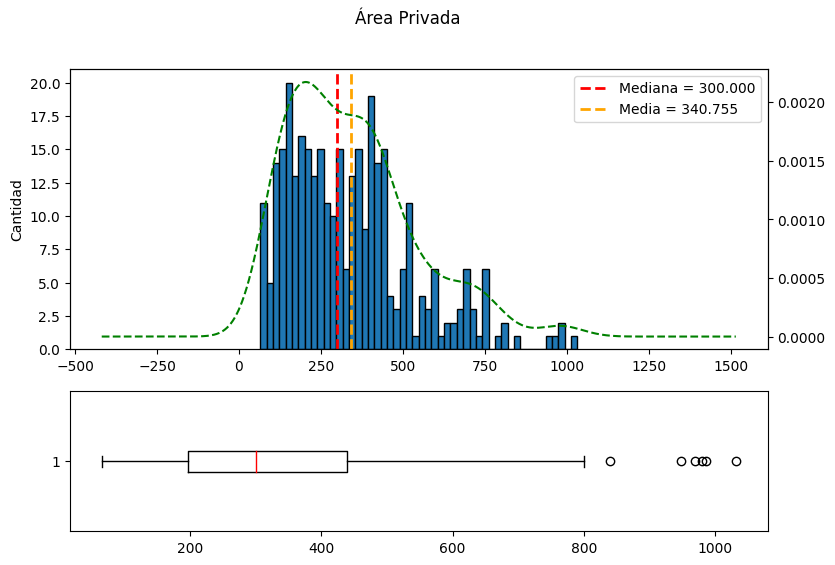

In [14]:
graph_numeric_without_outliers(houses, ['Precio','Terreno', 'Área Privada'])

Ahora sí, sin tantos valores extremos podemos observar la distribución también asimétrica con cola hacia la derecha del área y terreno de las casas.
Agregué también el precio para apreciarlo mejor, pero su distribución no cambio de forma.

## Departamentos

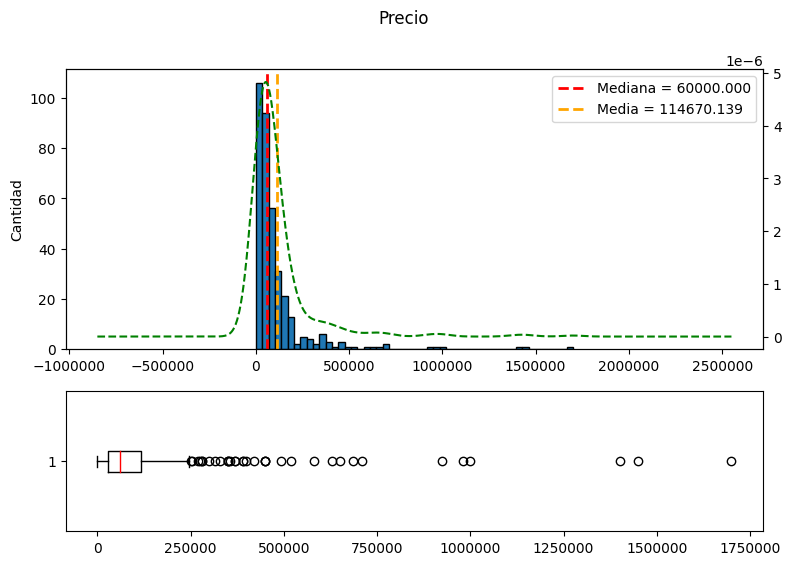

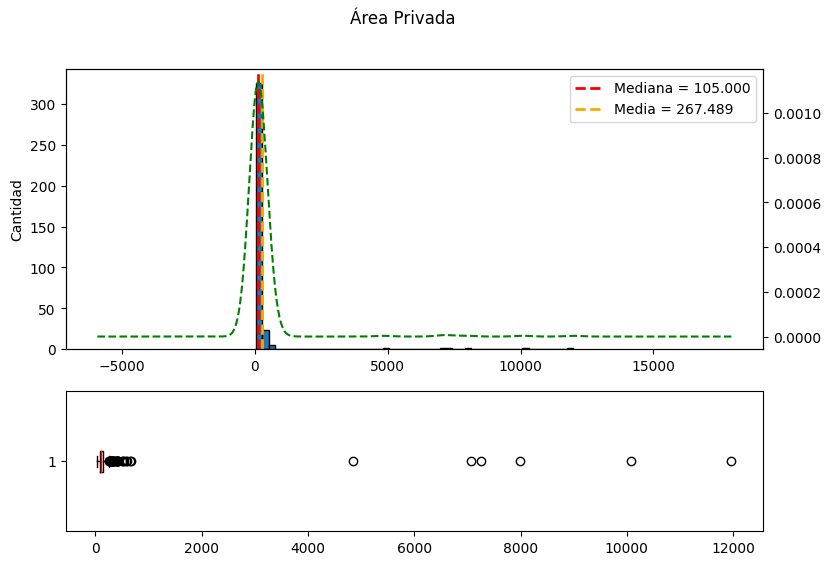

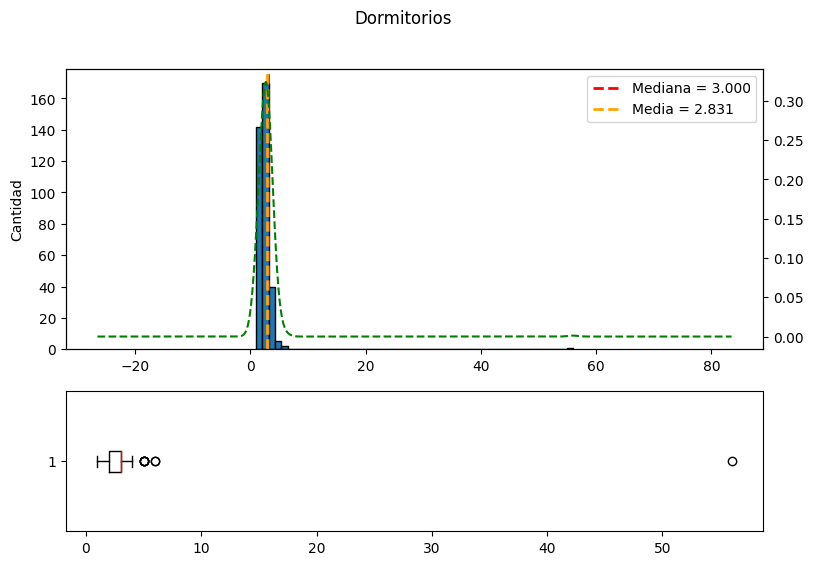

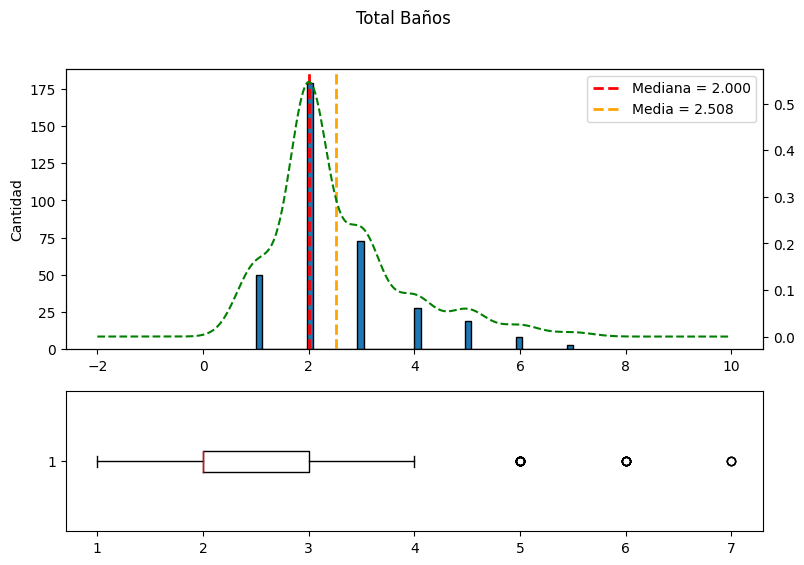

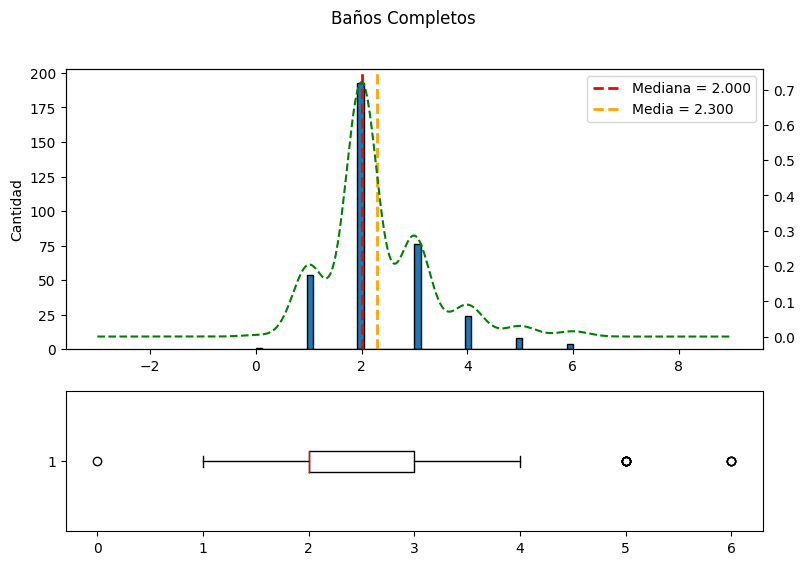

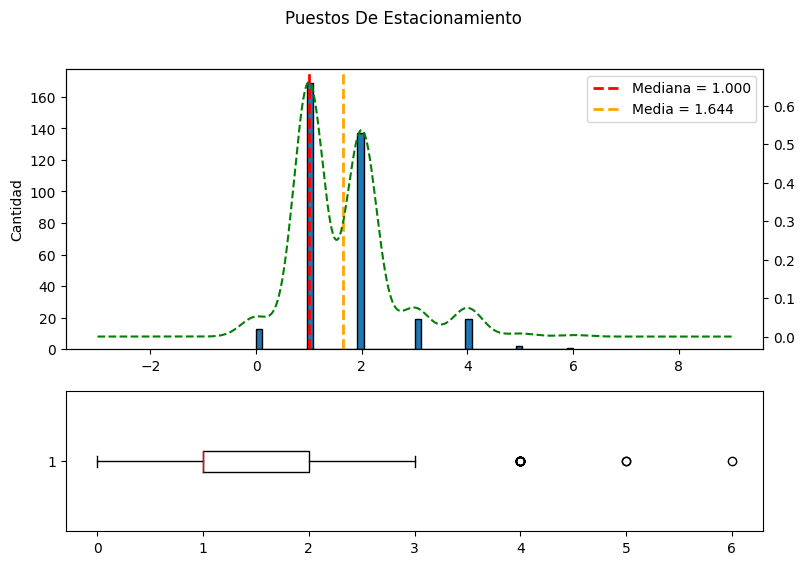

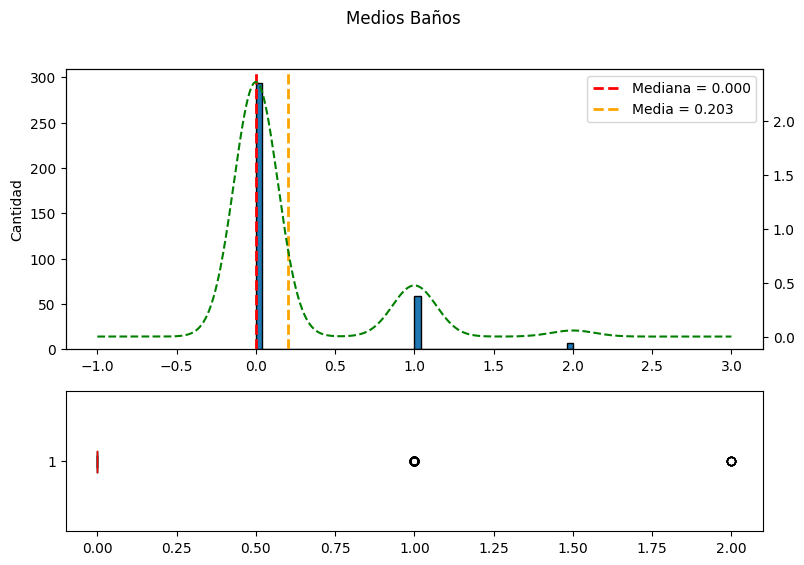

In [15]:
graph_numeric_features(apartments, apartments_numeric_features)

Para los departamentos tenemos una situación parecida con respecto a presencia de outliers que distorsionan el análisis para el terreno y área, pero en particular para departamentos parece haber una mayor asimetría en los precios a simple vista.  
También, es de interés la forma del gráfico para los medios baños, lo cual se debe a que no es común que haya medios baños en departamentos.

In [16]:
# Mayor valor positivo del skew -> mayor longitud de la cola derecha (mas asimetrico)
print("Skew para casas: ",houses['Precio'].skew())
print("Skew para departamentos: ", apartments['Precio'].skew())
# Mayor valor de kurtosis -> colas mas gruesas, centro mas "en punta" y menor proporcion de valores intermedios
print(f"Kurtosis para casas: {houses['Precio'].kurt()}")
print(f"Kurtosis para departamentos: {apartments['Precio'].kurt()}")


Skew para casas:  3.5924700246070107
Skew para departamentos:  4.828882504006058
Kurtosis para casas: 18.160183788256482
Kurtosis para departamentos: 29.47595285849255


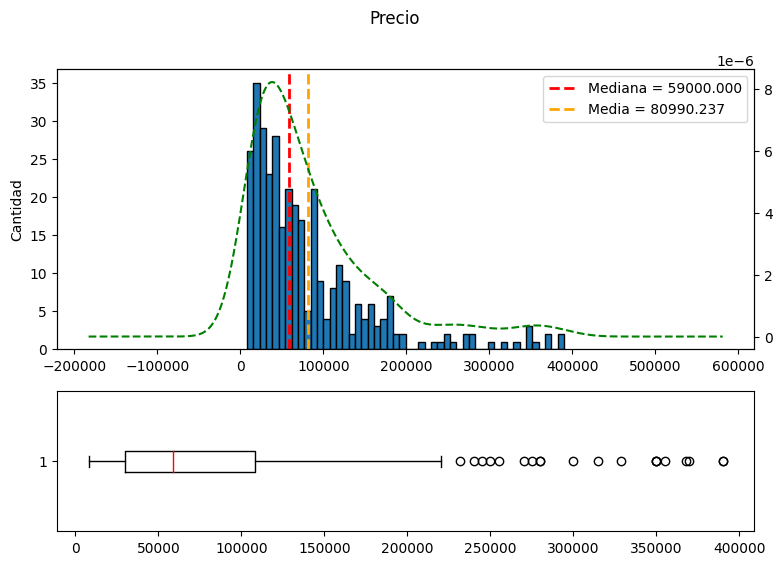

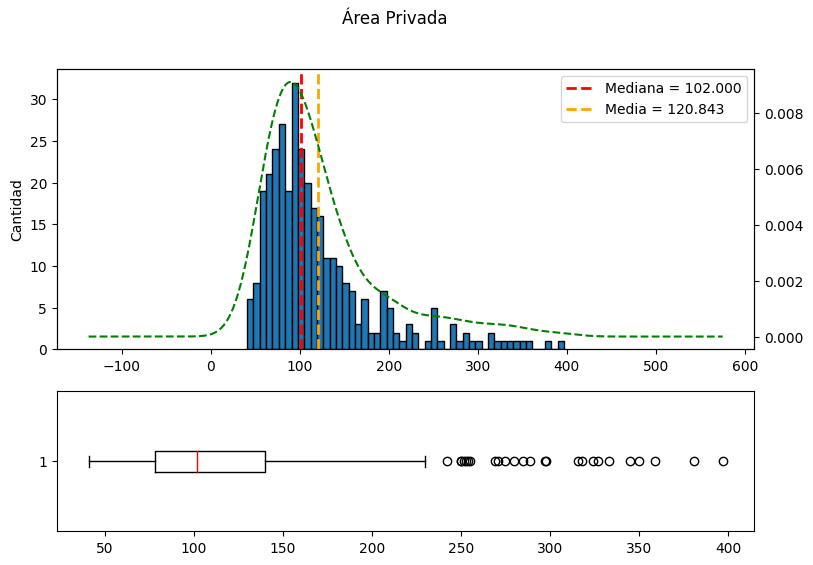

In [17]:
graph_numeric_without_outliers(apartments, ['Precio', 'Área Privada'])

Ahora sin los outliers, se puede ver que se repite el patrón de asimetría con cola hacia la derecha también para los departamentos.

# Análisis de los datos categóricos

In [18]:
# Separo columnas categoricas y recorto algunas otras categorias tambien categoricas
# Recorto pais porque es siempre el mismo, y recorto las demas porque son demasiadas y no son de interes para graficar
houses_categorical_features = [col for col in houses.columns 
                        if (houses[col].dtype == 'object' and col not in ['Codígo RAH', 'Calle', 'País', 'Urbanización', 'Tipo de Propiedad'])]
apartments_categorical_features = [col for col in apartments.columns 
                        if (apartments[col].dtype == 'object' and col not in ['Codígo RAH', 'Calle', 'País', 'Urbanización', 'Tipo de Propiedad'])]

In [19]:
houses_categorical_features

['Estilo',
 'Estado Del Inmueble',
 'Tipo De Estacionamiento',
 'Amoblado',
 'Dormitorio De Servicio',
 'Estado',
 'Ciudad']

In [20]:
def graph_categorical_features(df, features):
    for col in features:
        fig = plt.figure(figsize=(9, 6))
        ax = fig.gca()

        counts = df[col].value_counts().sort_index()
        
        colors = [np.random.rand(3,) for i in range(len(counts))]
        
        counts.plot.bar(ax = ax, color=colors,edgecolor='black')
        
        ax.set_title(col)
        ax.set_ylabel('Cantidad')
plt.show()

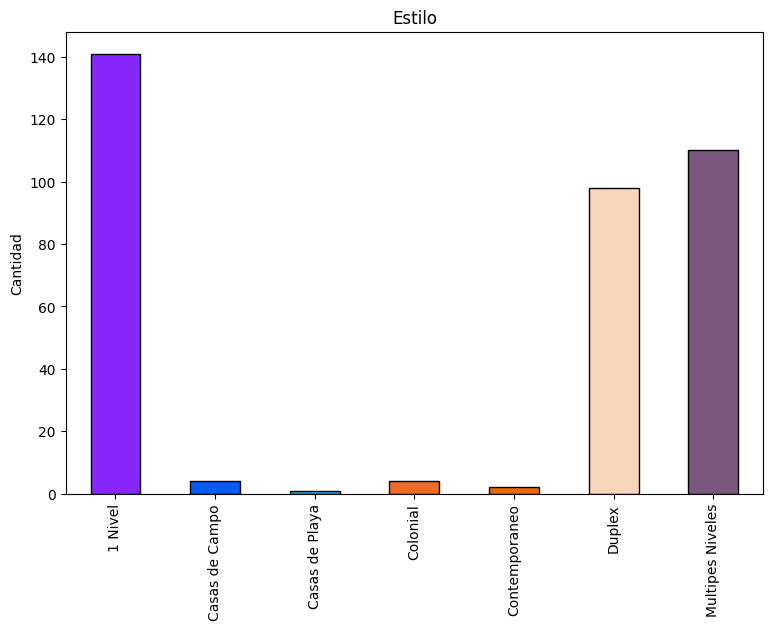

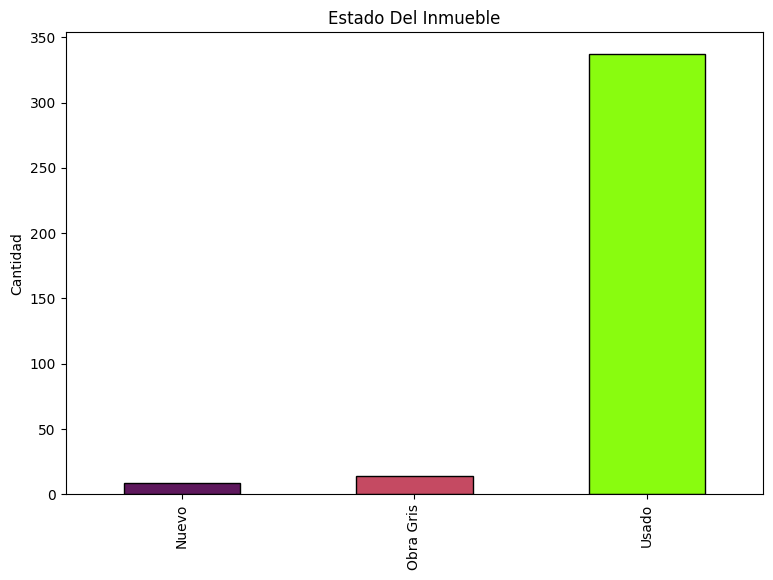

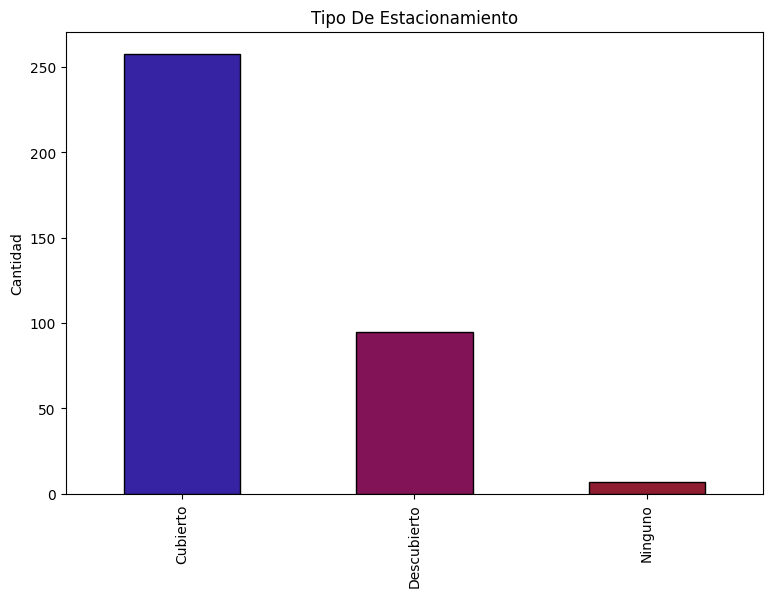

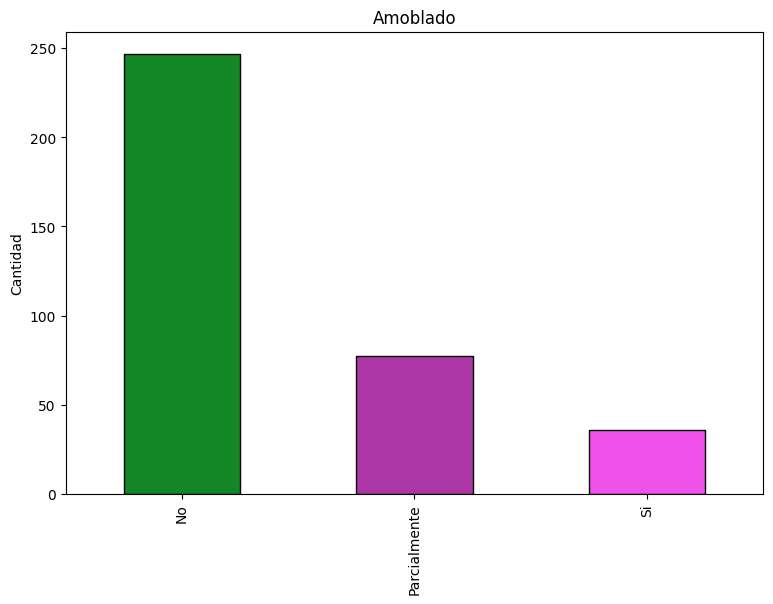

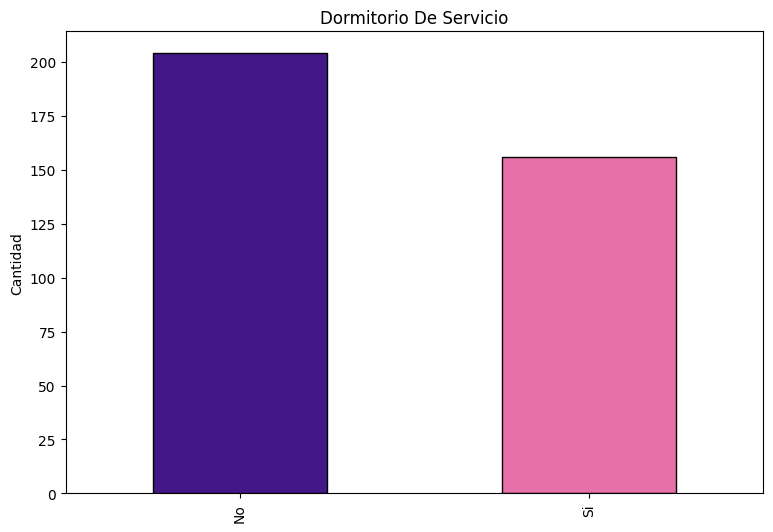

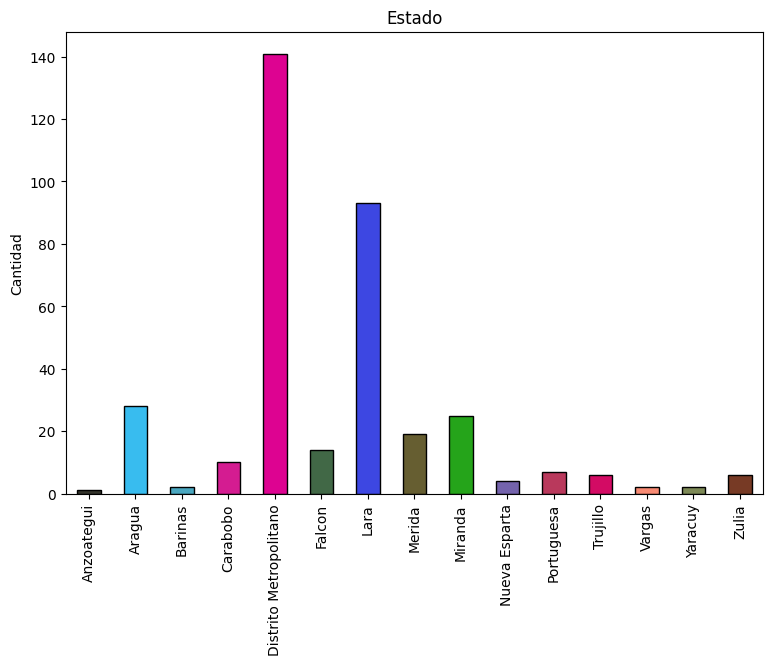

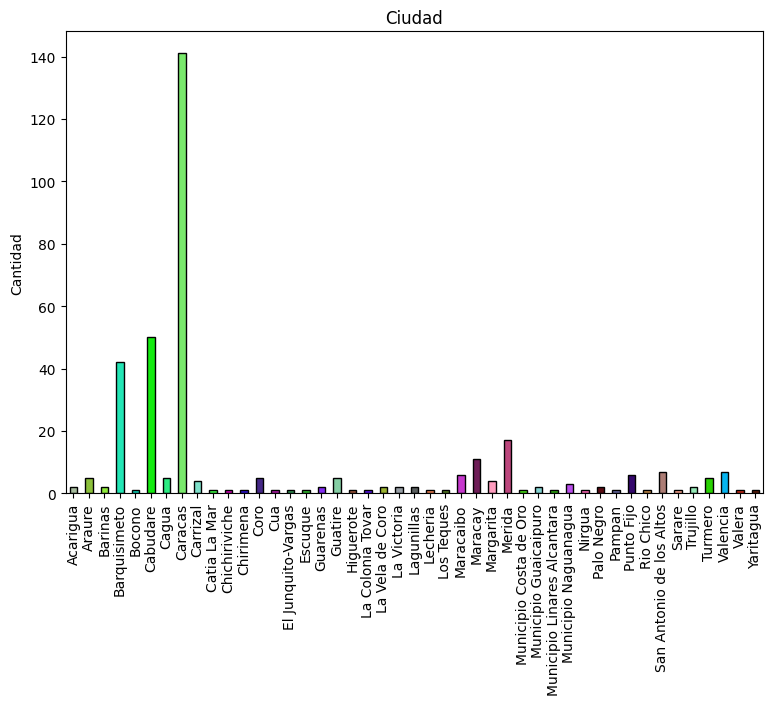

In [21]:
graph_categorical_features(houses, houses_categorical_features)

# Relación entre las variables y precios

In [22]:
from scipy.stats import linregress

## Relación entre precio y variables numéricas "continuas"

In [23]:
# Quito los outliers directamente porque se que si los dejo van a afectar demasiado la regresion
def graph_numeric_relations(df, features):
    for col in features:
        fig = plt.figure(figsize=(9,6))
        ax = fig.gca()

        feature = df[col]
        df_filtered_for_outliers = df[(feature < feature.quantile(q=0.95)) & (feature > feature.quantile(q=0.01))]

        try:
            feature = df_filtered_for_outliers[col].astype(int)
            label = df_filtered_for_outliers['Precio']
        except pd.errors.IntCastingNaNError:
            feature = df_filtered_for_outliers[ df_filtered_for_outliers[col].notnull() ][col]
            label = df_filtered_for_outliers[ df_filtered_for_outliers[col].notnull() ]['Precio']

        corr = feature.corr(label)

        plt.scatter(x=feature, y=label)

        lin_reg = linregress(x=feature, y=label)
        line = [ lin_reg.slope * xi + lin_reg.intercept for xi in feature ]
        ax.plot(feature, line, color='red')

        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        ax.text(0.05, 0.95, f'Correlación: {corr}\n'+r'$R^{2}$'+f': {lin_reg.rvalue**2:.4f}', transform=ax.transAxes, fontsize=10, verticalalignment='top', bbox=props)

        ax.set_xlabel(col)
        ax.set_ylabel('Precio')
        ax.ticklabel_format(style='plain')
        ax.set_title(f'Precio en función de {col}')
    plt.show()

### Casas

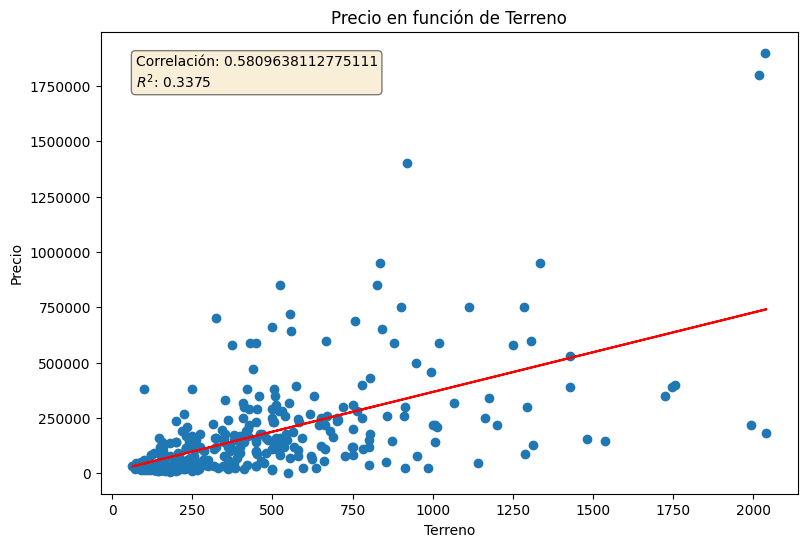

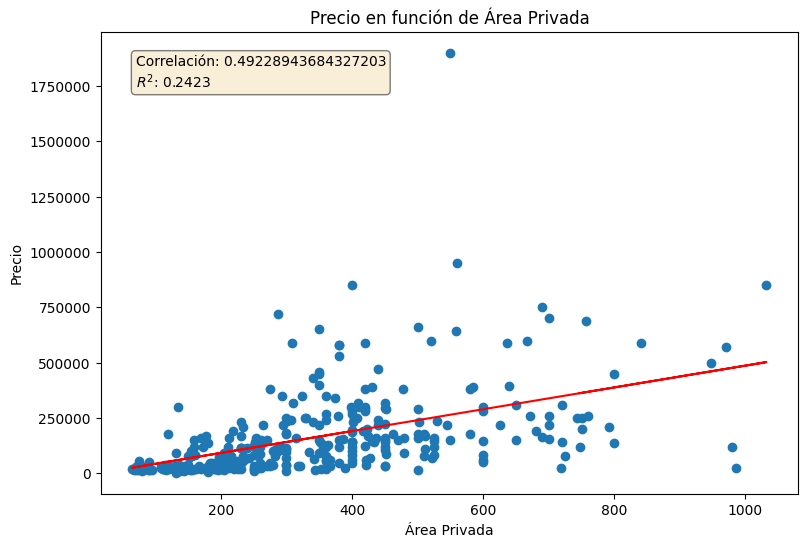

In [24]:
graph_numeric_relations(houses, ['Terreno', 'Área Privada'])

Se puede observar de estos gráficos que a medida que aumenta el área o terreno de la propiedad, el precio tiende a crecer.

### Departamentos

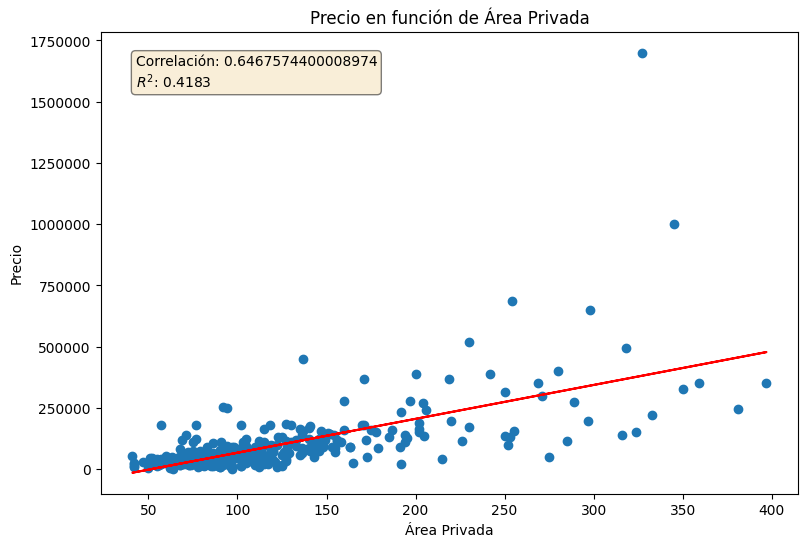

In [25]:
graph_numeric_relations(apartments, ['Área Privada'])

Para los departamentos también se observa el patrón de crecimiento de precios al crecer el área de la propiedad.

## Relación entre precios y variables categóricas

In [48]:
def graph_categorical_relations(df, features):
    for col in features:
        fig = plt.figure(figsize=(9,6))
        ax = fig.gca()

        mask_price = (df['Precio'] >= df['Precio'].quantile(q=0.05)) & (df['Precio'] <= df['Precio'].quantile(q=0.95))
        
        if df[col].dtype == 'object':
            df2 = df.loc[ mask_price, ['Precio', col]]
        else:
            mask_col = (df[col] >= df[col].quantile(q=0.01)) & (df[col] <= df[col].quantile(q=0.95))
            df2 = df.loc[mask_col & mask_price, ['Precio', col]]
        
        df2.boxplot(column = 'Precio', by = col, ax=ax)
        ax.set_ylabel('Precio')
        ax.get_yaxis().set_major_formatter(lambda x, pos: f'{x:.0f}')

        if len(ax.get_xticklabels()) > 10 and any([len(str(label.get_text())) >= 5 for label in ax.get_xticklabels()]):
            ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
        elif len(ax.get_xticklabels()) > 5 and any([len(str(label.get_text())) >= 5 for label in ax.get_xticklabels()]):
            ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

        ax.set_title('Precio en función de ' + col)
    plt.show()

### Casas

In [27]:
houses.columns

Index(['Precio', 'Codígo RAH', 'Tipo de Propiedad', 'Estilo', 'Área Privada',
       'Terreno', 'Estado Del Inmueble', 'Dormitorios', 'Total Baños',
       'Baños Completos', 'Tipo De Estacionamiento',
       'Puestos De Estacionamiento', 'Amoblado', 'Dormitorio De Servicio',
       'Calle', 'País', 'Estado', 'Ciudad', 'Urbanización', 'Medios Baños'],
      dtype='object')

In [28]:
houses_cat_features = [col for col in houses.columns 
                      if col not in ['Precio', 'Área Privada', 'Terreno', 'Codígo RAH', 'Calle', 'País', 'Urbanización', 'Tipo de Propiedad'] ]
apartments_cat_features = [col for col in apartments.columns 
                      if col not in ['Precio', 'Área Privada', 'Terreno', 'Codígo RAH', 'Calle', 'País', 'Urbanización', 'Tipo de Propiedad'] ]

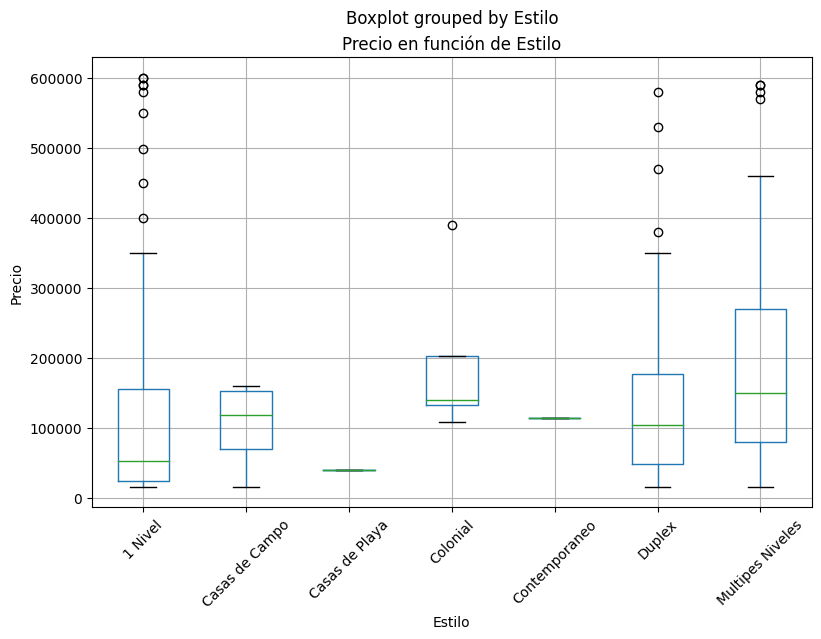

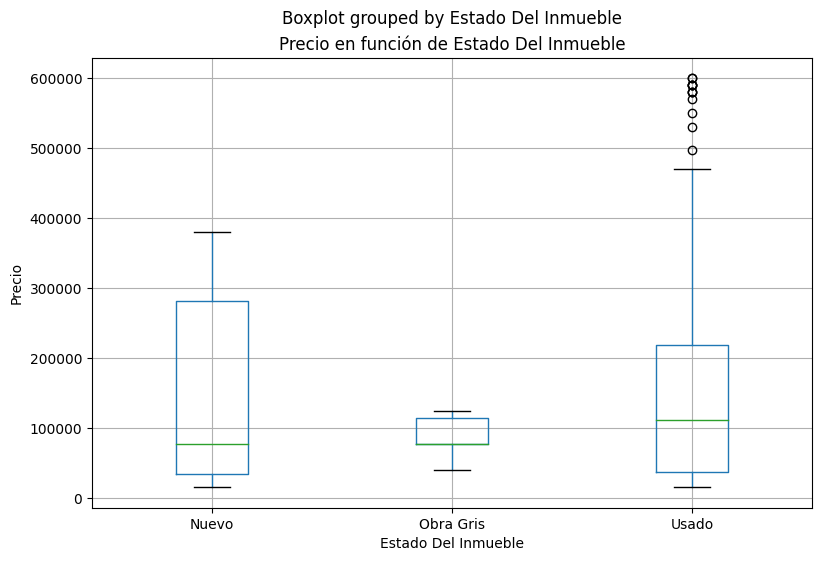

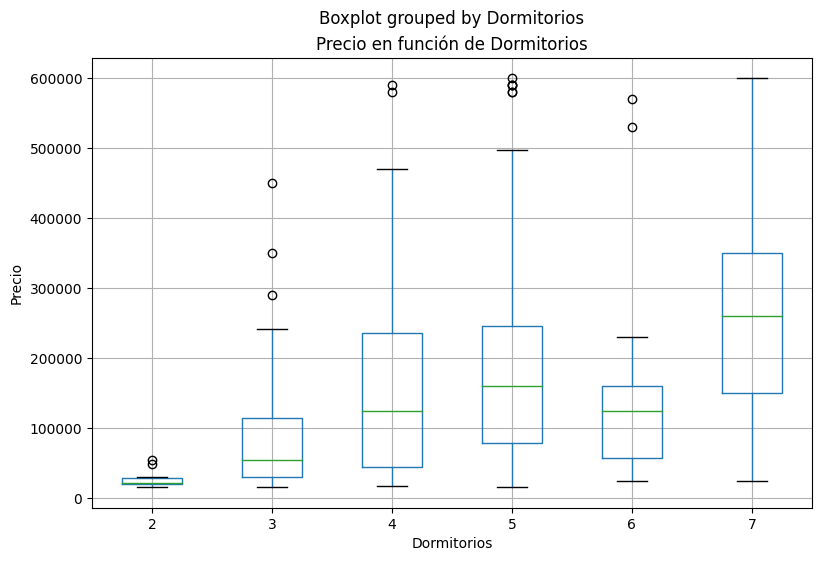

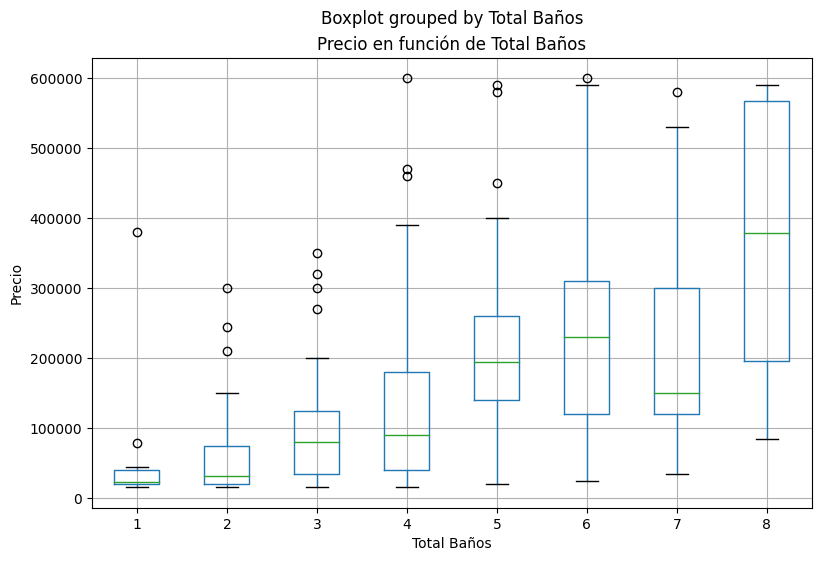

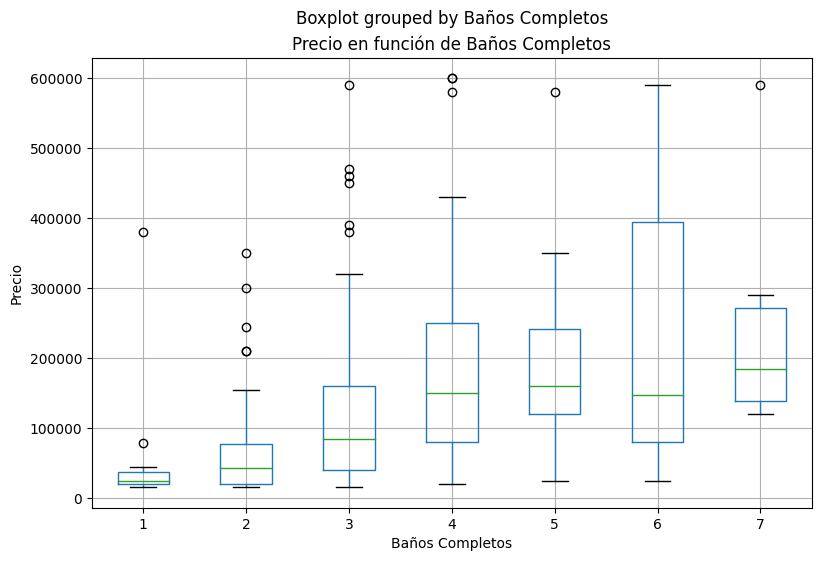

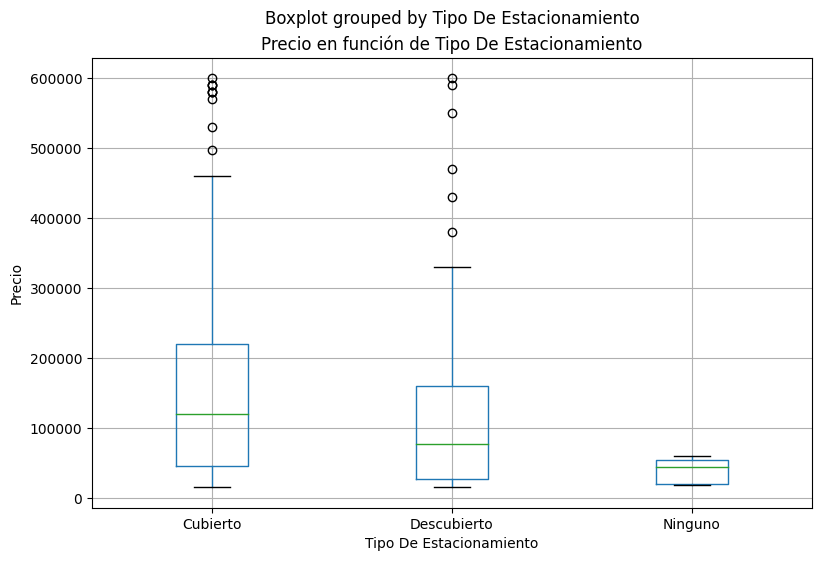

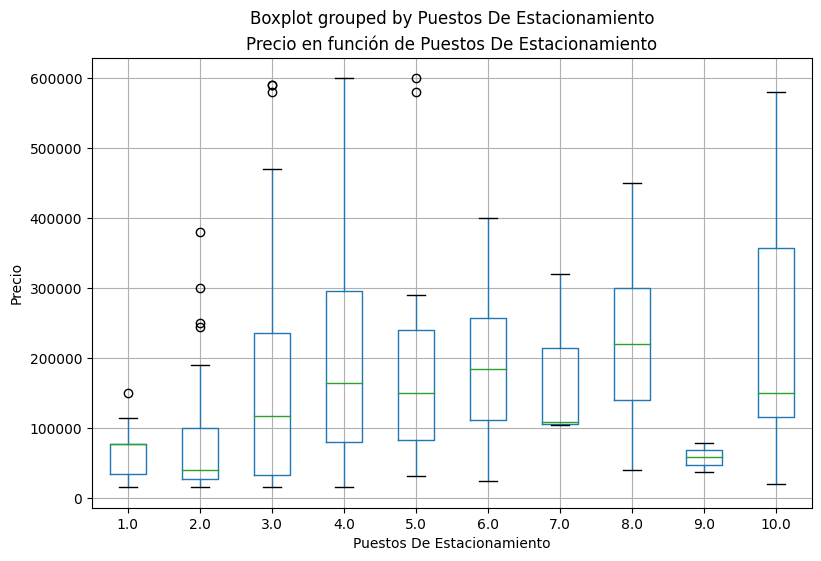

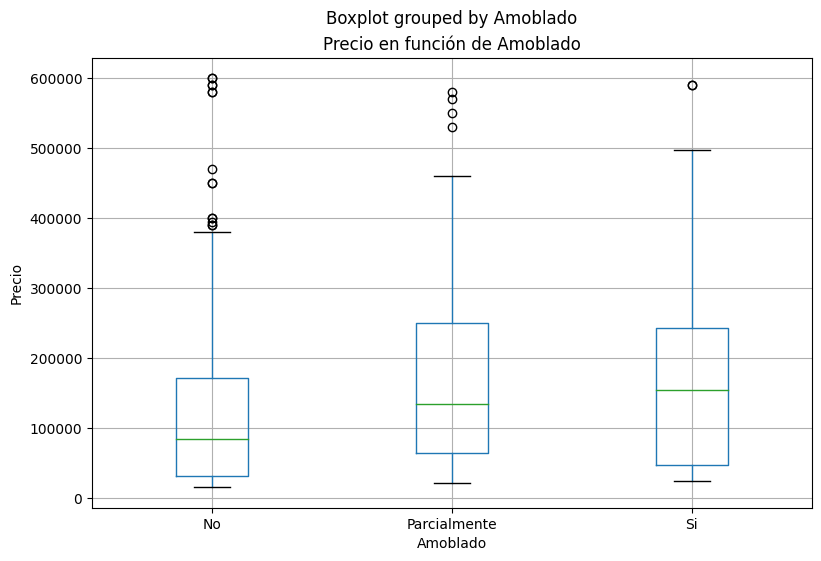

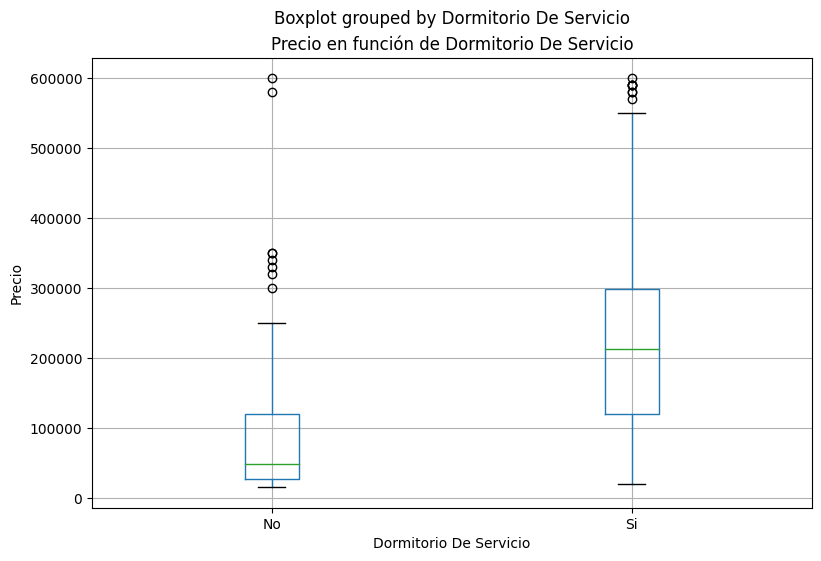

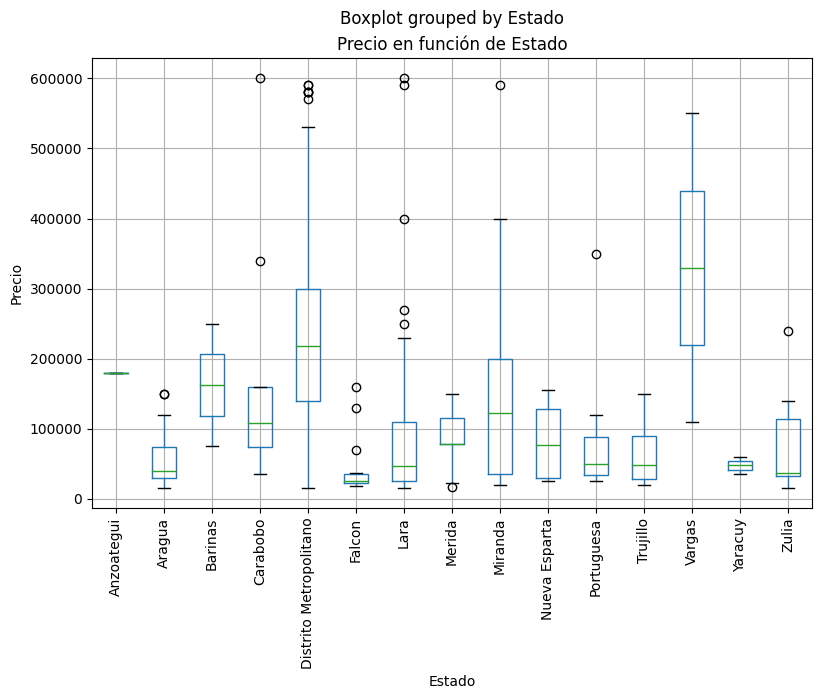

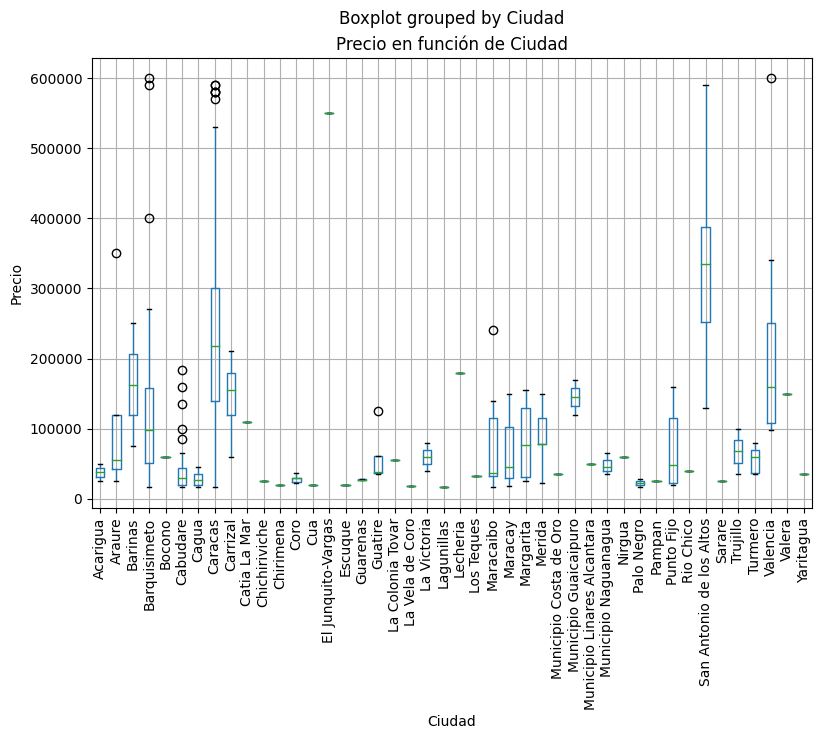

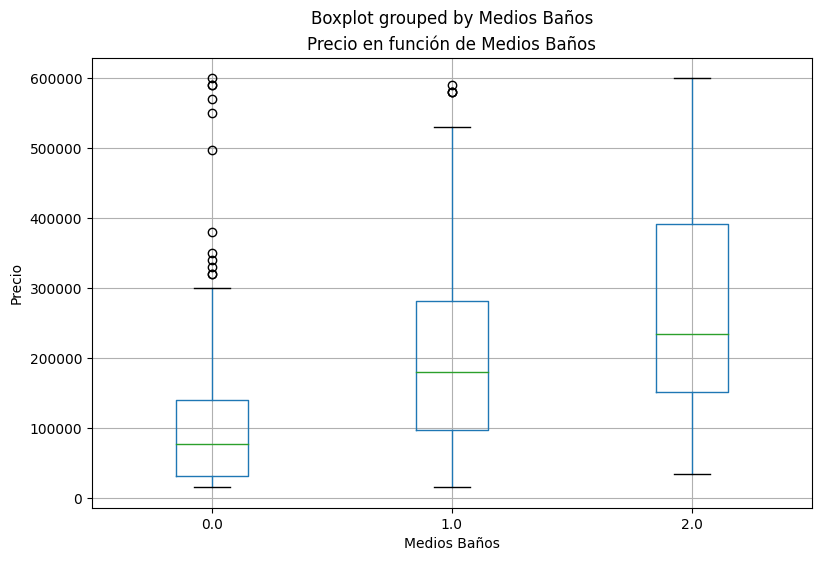

In [49]:
graph_categorical_relations(houses, houses_cat_features)

Si bien se pueden ver el esbozo de algunas relaciones en estos gráficos, no hay que tomarlos como algo concreto ya que se está intentando aislar relaciones entre precio y la variable graficada, lo cual es una simplificación burda de la realidad. Por ejemplo, el precio de una propiedad parece crecer cuando crece el número total de baños, pero esto puede deberse no a que la gente sea fanática de los baños, sino a que una mayor cantidad de baños implica un área más grande (casa más grande).  
Aclarado esto, parece que el estado del inmueble no parece tener mucha incidencia en el precio del inmueble. Que el estado del inmueble no tenga incidencia es raro, podría deberse a un estancamiento en el mercado inmobiliario de casas, o simplemente a un dataset no lo suficientemente grande, así que su efecto verdadero es inconcluso.  
Como era de esperarse, pareciera haber una relación entre el precio del inmueble y su locación, tamaño y tipo.

### Departamentos

In [50]:
apartments.columns

Index(['Precio', 'Codígo RAH', 'Tipo de Propiedad', 'Estilo', 'Área Privada',
       'Estado Del Inmueble', 'Dormitorios', 'Total Baños', 'Baños Completos',
       'Tipo De Estacionamiento', 'Puestos De Estacionamiento', 'Amoblado',
       'Dormitorio De Servicio', 'País', 'Estado', 'Ciudad', 'Urbanización',
       'Medios Baños'],
      dtype='object')

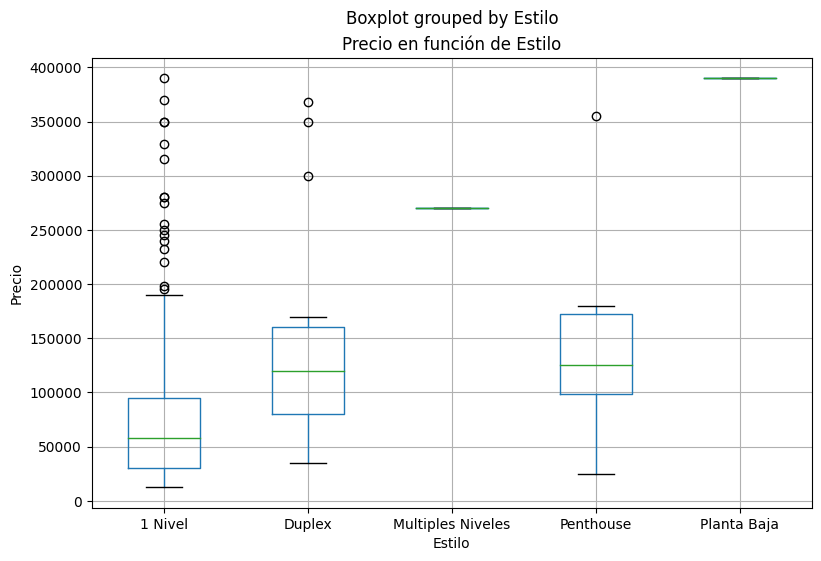

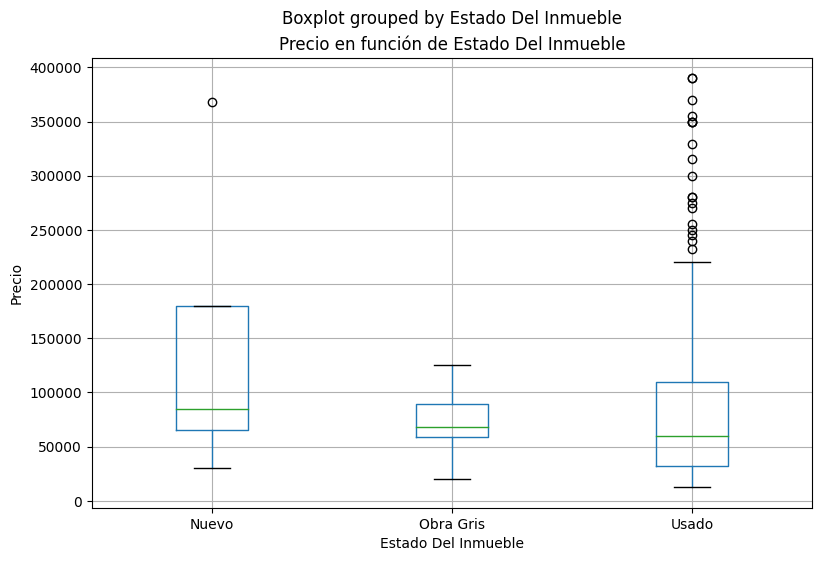

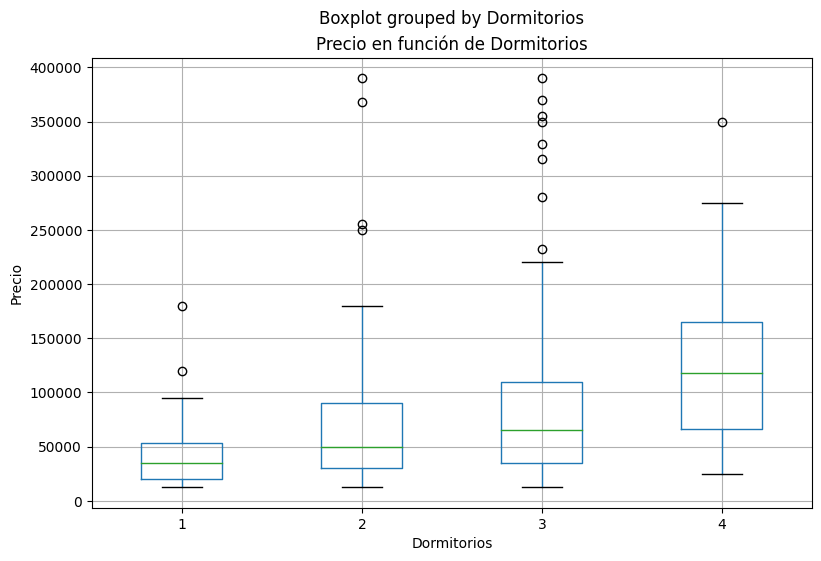

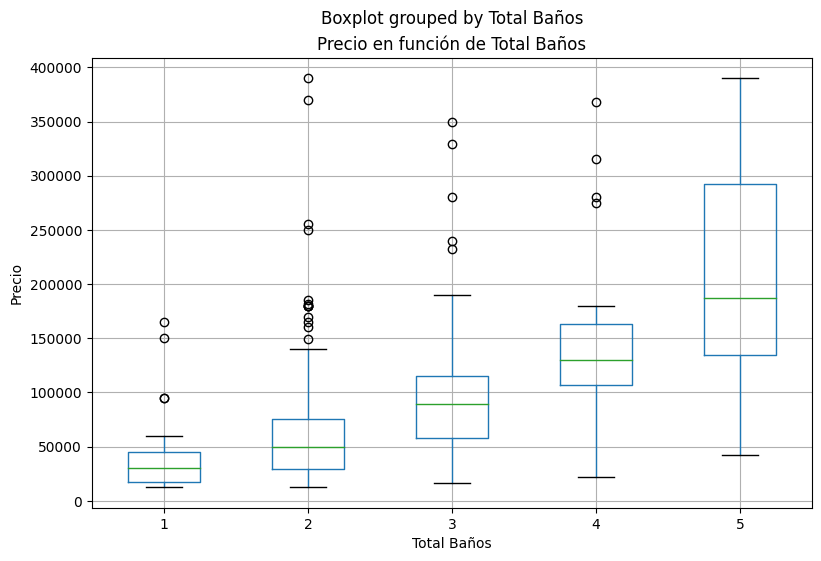

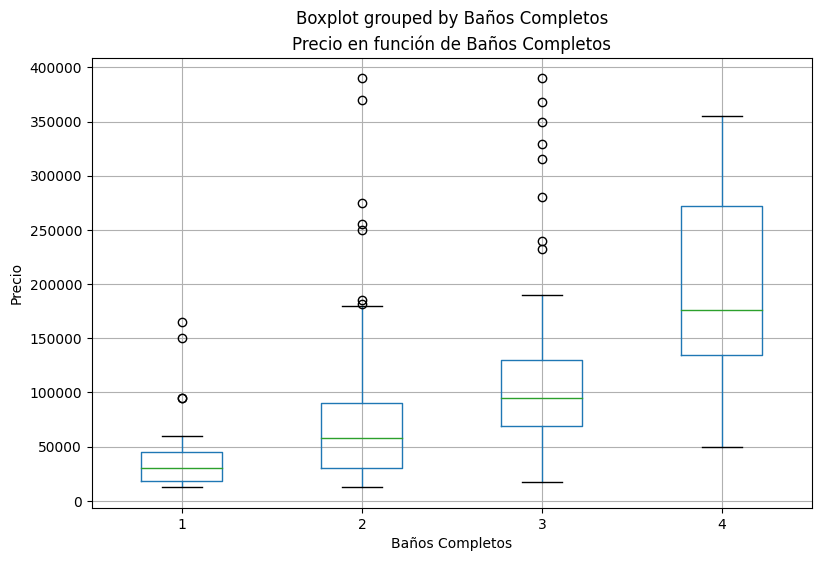

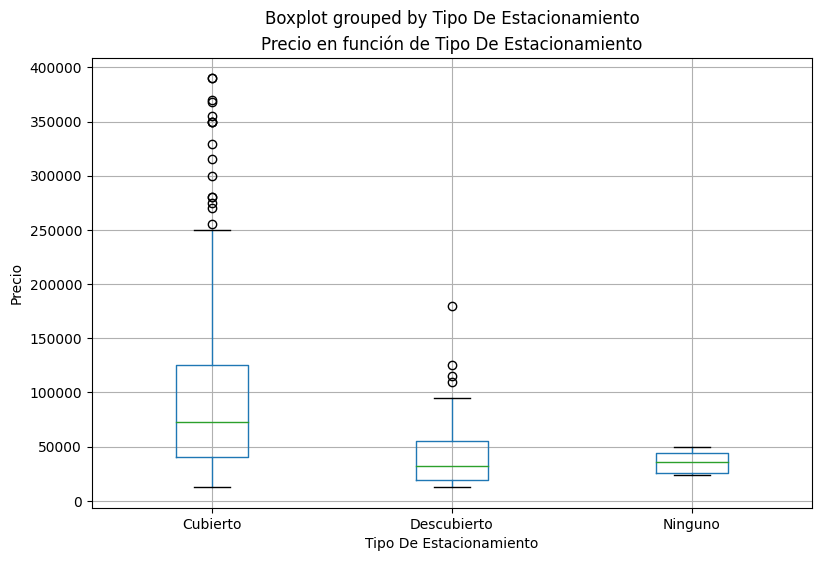

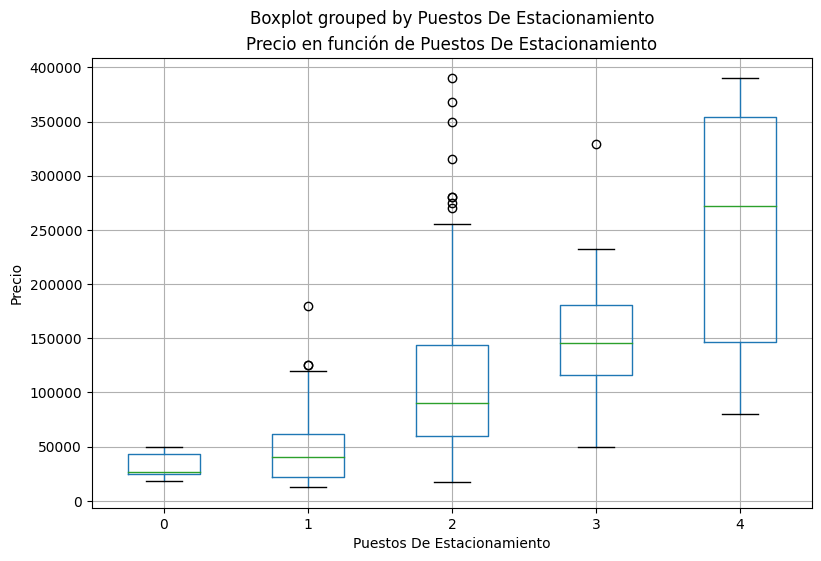

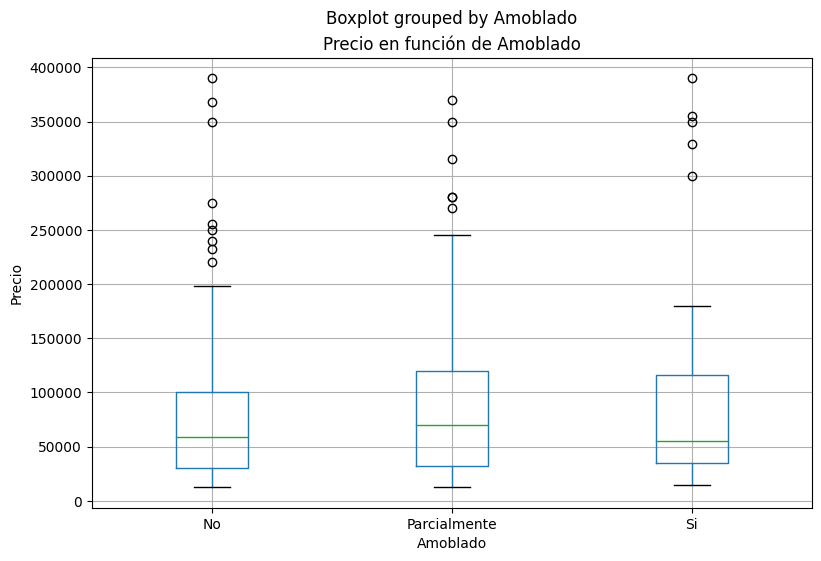

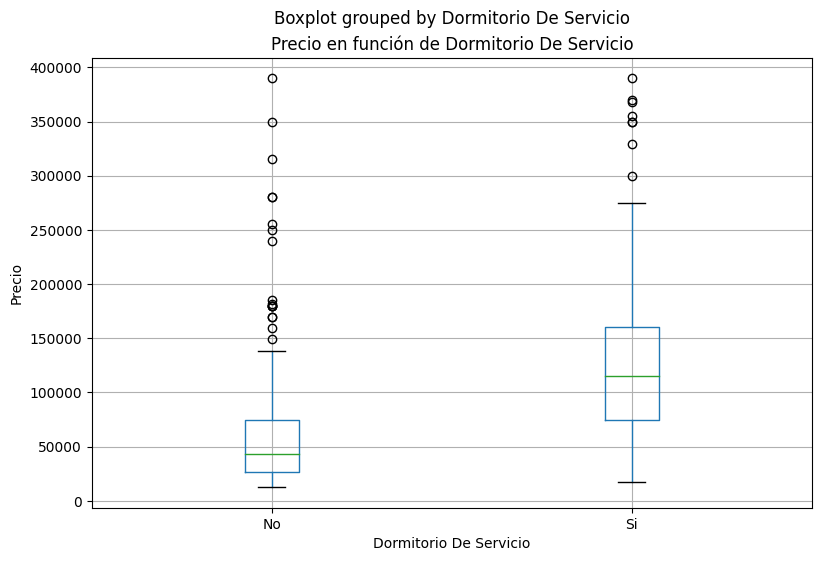

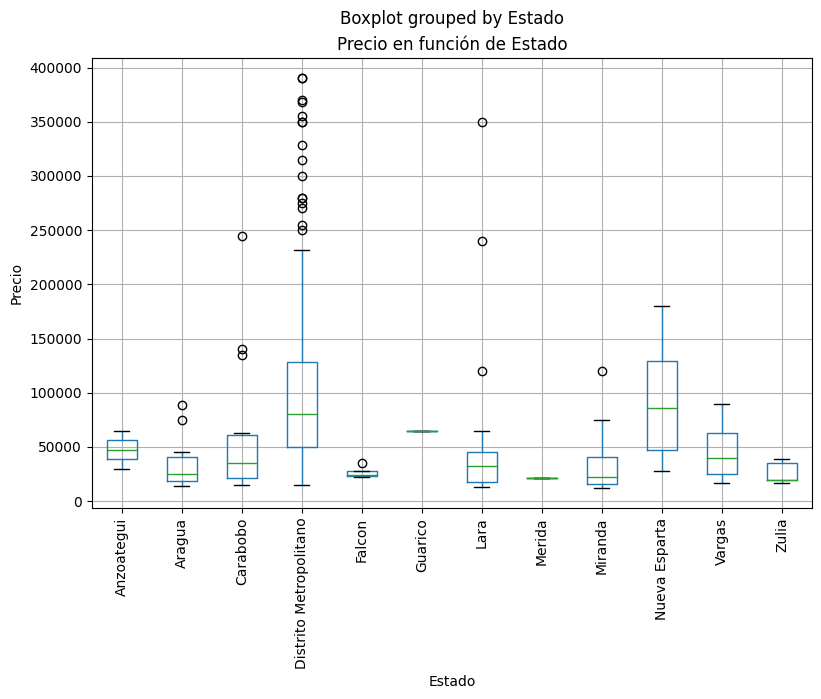

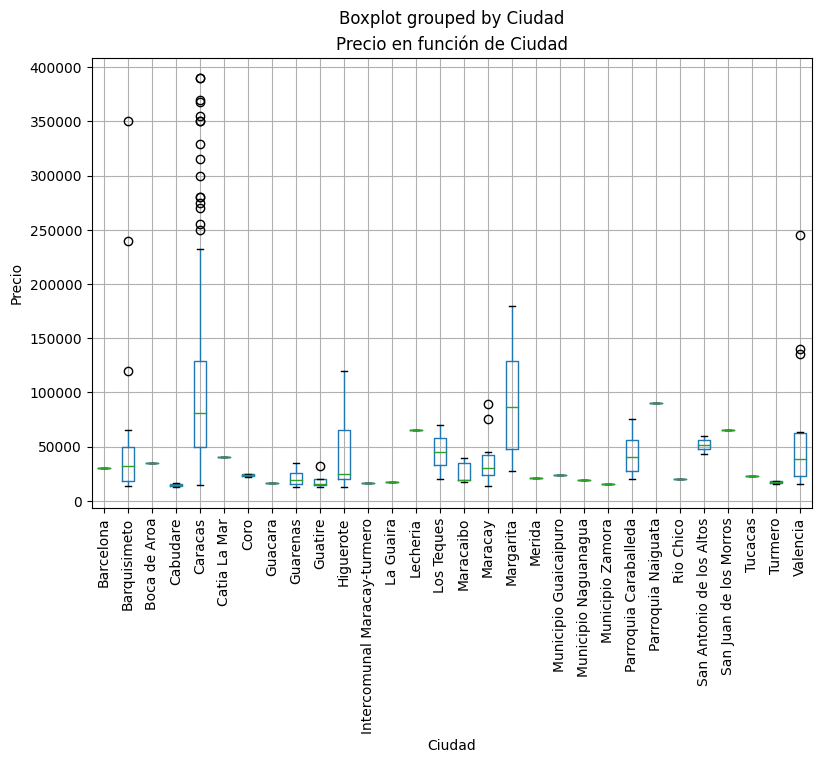

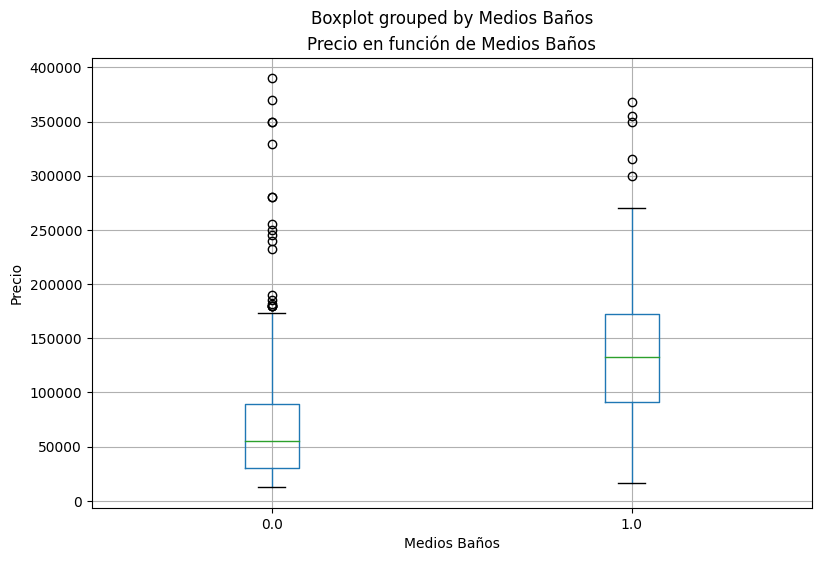

In [51]:
graph_categorical_relations(apartments, apartments_cat_features)

Para los departamentos parece ser una situación análoga a las casas, a excepción que ahora el estado del inmueble tiene mayor efecto en el precio.  

A pesar de haber filtrado gran parte de los outliers usando los cuantiles 95% y 1%, aún persisten algunos que distorsionan la escala de los gráficos.